<a href="https://colab.research.google.com/github/SudheenaMisra/Personal-Projects_Learning-Stage/blob/main/1_Hottest_topics_MachineLearning/Hottest_topics_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount the Google Drive to Google Colab for accessing dataset
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd

### Loading data
The NIPS conference (Neural Information Processing Systems) is one of the most prestigious yearly events in the machine learning community. At each NIPS conference, a large number of research papers are published. Over 50,000 PDF files were automatically downloaded and processed to obtain a dataset on various machine learning techniques. The CSV file contains information on the different NIPS papers that were published from 1987 until 2017 (30 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods and many more.

In [3]:
#loading data
papers = pd.read_csv("/content/gdrive/MyDrive/Datasets/papers.csv")

In [4]:
#Inspecting the first five rows
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [5]:
#Inspecting the last five rows
papers.tail()

,id,year,title,event_type,pdf_name,abstract,paper_text
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...
7240,999,1994,Correlation and Interpolation Networks for Rea...,NaN,999-correlation-and-interpolation-networks-for...,Abstract Missing,Correlation and Interpolation Networks for\nRe...


In [6]:
#columns
papers.columns

Index(['id', 'year', 'title', 'event_type', 'pdf_name', 'abstract',
       'paper_text'],
      dtype='object')

### Preparing the data for analysis
In this project we are only interested in the text data associated with the paper as well as the year the paper was published in.
We will analyze this text data using natural language processing. Since the file contains some metadata such as id's and filenames, it is necessary to remove all the columns that do not contain useful text information.

In [7]:
#Removing the columns 'id','event_type' and 'pdf_name'
papers.drop(columns=['id','event_type','pdf_name'], inplace=True)
papers.head()

#An alternative way to remove these columns
#papers.drop(lables=['id','event_type','pdf_name'], axis=1, inplace=True)

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


year
1987     90
1988     94
1989    101
1990    143
1991    144
1992    127
1993    158
1994    140
1995    152
1996    152
1997    150
1998    151
1999    150
2000    152
2001    197
2002    207
2003    198
2004    207
2005    207
2006    204
2007    217
2008    250
2009    262
2010    292
2011    306
2012    368
2013    360
2014    411
2015    403
2016    569
2017    679
dtype: int64


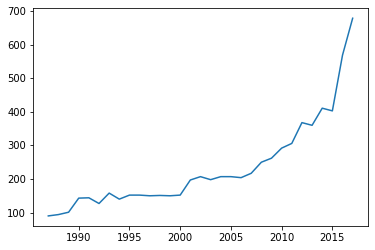

In [8]:
# Group the papers by year
groups = papers.groupby(papers["year"])
# Determine the size of each group
counts = groups.size()
print(counts)
# Visualise the counts as a bar plot
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(counts)

### Preprocessing the text data
Let's now analyze the titles of the different papers to identify machine learning trends. First, we will perform some simple preprocessing on the titles in order to make them more amenable for analysis. We will use a regular expression to remove any punctuation in the title. Then we will perform lowercasing. We'll then print the titles of the first rows before and after applying the modification.

In [9]:
# Load the regular expression library
import re 

# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_punctuation_free'] = papers['title'].map(lambda x: re.sub('[,\.,!?]', '', x))

# Convert the titles to lowercase
papers['title_punctuation_free'] = papers['title_punctuation_free'].map(lambda x: x.lower())

# Print the title punctuation free titles of the first rows 
print(papers['title_punctuation_free'].head())


0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object
0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_punctuation_free, dtype: object


### A word cloud to visualize the preprocessed text data
In order to verify whether the preprocessing happened correctly, we can make a word cloud of the titles of the research papers. This will give us a visual representation of the most common words. Visualisation is key to understanding whether we are still on the right track! In addition, it allows us to verify whether we need additional preprocessing before further analyzing the text data.

Python has a massive number of open libraries! Instead of trying to develop a method to create word clouds ourselves, we'll use Andreas Mueller's wordcloud library.

The combined titles are:
 Self-Organization of Associative Database and Its Applications A Mean Field Theory of Layer IV of Visual Cortex and Its Application to Artificial Neural Networks Storing Covariance by the Associative Long-Term Potentiation and Depression of Synaptic Strengths in the Hippocampus Bayesian Query Construction for Neural Network Models Neural Network Ensembles, Cross Validation, and Active Learning Using a neural net to instantiate a deformable model Plasticity-Mediated Competitive Learning ICEG Morphology Classification using an Analogue VLSI Neural Network Real-Time Control of a Tokamak Plasma Using Neural Networks Pulsestream Synapses with Non-Volatile Analogue Amorphous-Silicon Memories Learning to Play the Game of Chess Multidimensional Scaling and Data Clustering An experimental comparison of recurrent neural networks Training Multilayer Perceptrons with the Extended Kalman Algorithm Interference in Learning Internal Models of Inverse Dynamics in Humans Activ

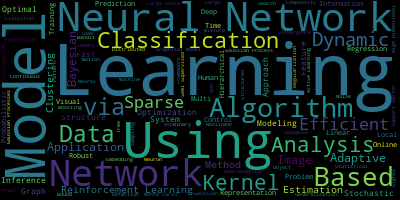

In [10]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
#Here we are joining all the titles with a space
s = " " 
long_string = s.join(papers['title'])
print("The combined titles are:\n",long_string)

# Create a WordCloud object
wc = wordcloud.WordCloud()

# Generate a word cloud
wc.generate(long_string)

# Visualize the word cloud
wc.to_image()

### Prepare the text for LDA analysis
The main text analysis method that we will use is latent Dirichlet allocation (LDA). LDA is able to perform topic detection on large document sets, determining what the main 'topics' are in a large unlabeled set of texts. A 'topic' is a collection of words that tend to co-occur often. The hypothesis is that LDA might be able to clarify what the different topics in the research titles are. These topics can then be used as a starting point for further analysis.

LDA does not work directly on text data. First, it is necessary to convert the documents into a simple vector representation. This representation will then be used by LDA to determine the topics. Each entry of a 'document vector' will correspond with the number of times a word occurred in the document. In conclusion, we will convert a list of titles into a list of vectors, all with length equal to the vocabulary. For example, 'Analyzing machine learning trends with neural networks.' would be transformed into [1, 0, 1, ..., 1, 0].

We'll then plot the 10 most common words based on the outcome of this operation (the list of document vectors). As a check, these words should also occur in the word cloud.

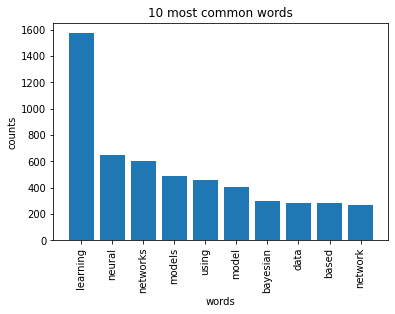

In [12]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words = 'english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_punctuation_free'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

### Analysing trends with LDA
Finally, the research titles will be analyzed using LDA. Note that in order to process a new set of documents (e.g. news articles), a similar set of steps will be required to preprocess the data. The flow that was constructed here can thus easily be exported for a new text dataset.

The only parameter we will tweak is the number of topics in the LDA algorithm. Typically, one would calculate the 'perplexity' metric to determine which number of topics is best and iterate over different amounts of topics until the lowest 'perplexity' is found. For now, let's play around with a different number of topics. From there, we can distinguish what each topic is about ('neural networks', 'reinforcement learning', 'kernel methods', 'gaussian processes', etc.).

In [13]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 15
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
learning object detection model recognition network segmentation fast matching 3d metric pattern based deep neural

Topic #1:
stochastic optimization neural gradient methods networks descent analog spectral convex convergence sequential vlsi network regularized

Topic #2:
large estimation models scale graphical structured maximum learning bounds margin error continuous inference entropy information

Topic #3:
model bayesian human learning nonparametric inference models networks using visual motion function probabilistic hierarchical graph

Topic #4:
learning multi order bandits reinforcement self online boosting label associative memory task class bandit regret

Topic #5:
vector sampling support propagation carlo monte belief using algorithm analysis machines regularization learning exponential em

Topic #6:
matrix brain rank data clustering low convex factorization completion tensor field learning optimal non mean

Topic #7:
learning gaussian sparse re

### The future of machine learning
Machine learning has become increasingly popular over the past years. The number of NIPS conference papers has risen exponentially, and people are continuously looking for ways on how they can incorporate machine learning into their products and services.The number of published papers has been rising over the past 10 years! This trend will probably continue for a few more years.